In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Definição de funções:

In [28]:
def show_image(title, img):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.axis('off')
    plt.show()

def clustering(image_rgb, k=2):

    pixel_values = image_rgb.reshape((-1, 3)) # vetorizando
    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)  # Critério de parada

    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    labels = labels.flatten()
    segmented_image = centers[labels]
    segmented_image = segmented_image.reshape(image_rgb.shape).astype(np.uint8)

    show_image(f"Imagem Segmentada (K={k})", segmented_image)

def graphos_segmentation(image, image_rgb, ret=None):

    if ret is None:
        ret = (0.1,0.1,0.8,0.9)
    
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    h, w, _ = image.shape
    rect = (int(w * ret[0]), int(h * ret[1]), int(w * ret[2]), int(h * ret[3]))  # (x, y, largura, altura)

    bg_model = np.zeros((1, 65), dtype=np.float64)
    fg_model = np.zeros((1, 65), dtype=np.float64)

    cv2.grabCut(image, mask, rect, bg_model, fg_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

    mask_fg = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0).astype("uint8")

    segmented_image = image_rgb * mask_fg[:, :, np.newaxis]
    show_image("Segmentação com Graph Cut", segmented_image)

Exemplo 1:

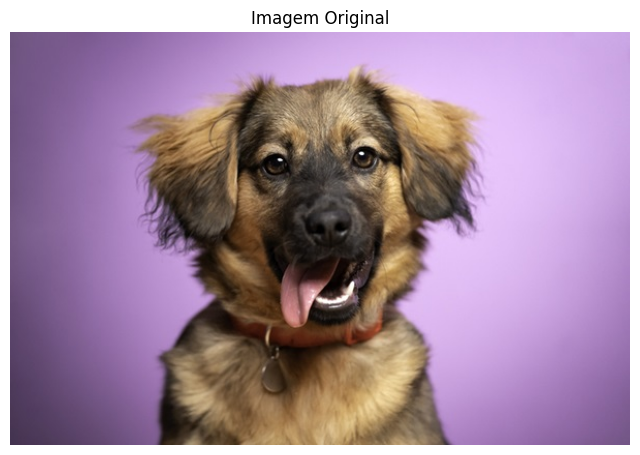

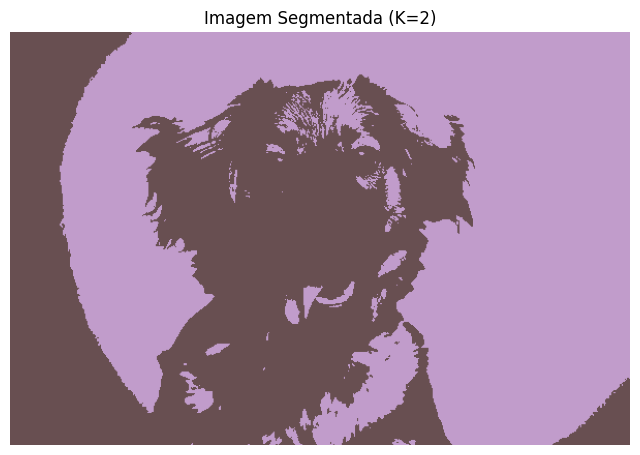

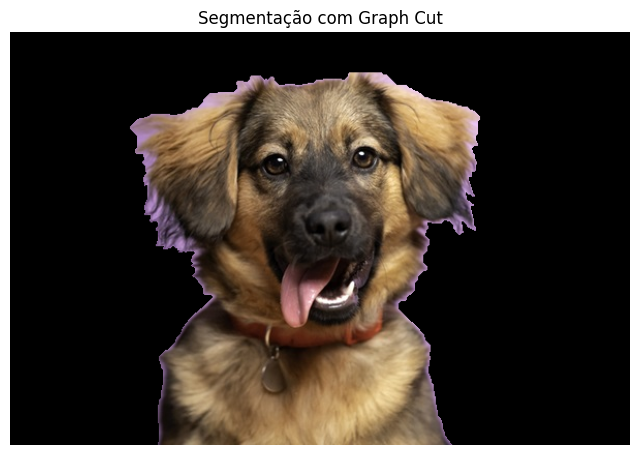

In [29]:
image_path = "sua_imagem.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

show_image("Imagem Original", image_rgb)

clustering(image_rgb)

ret = (0.1,0.1,0.8,0.9)
graphos_segmentation(image, image_rgb, ret)

Exemplo 2:

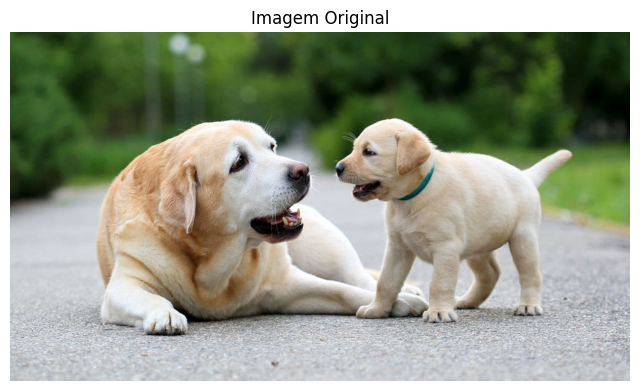

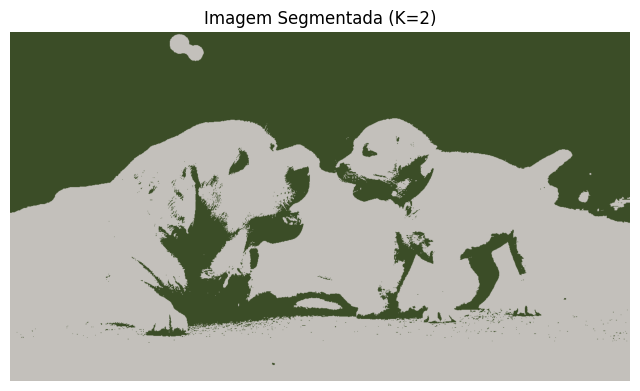

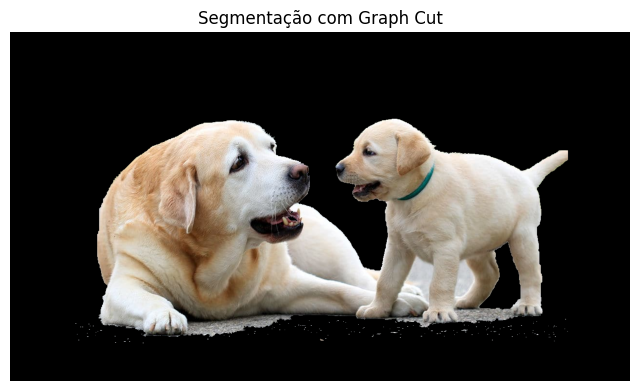

In [30]:
image_path = "sua_imagem_2.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

show_image("Imagem Original", image_rgb)

clustering(image_rgb)

ret = (0.1,0.1,0.8,0.9)
graphos_segmentation(image, image_rgb, ret)

Exemplo 3:

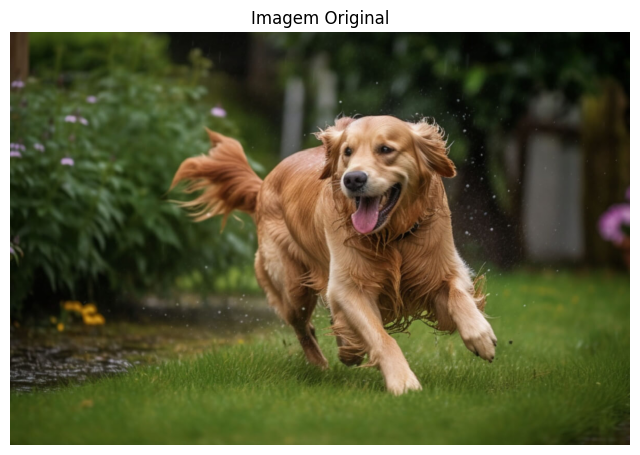

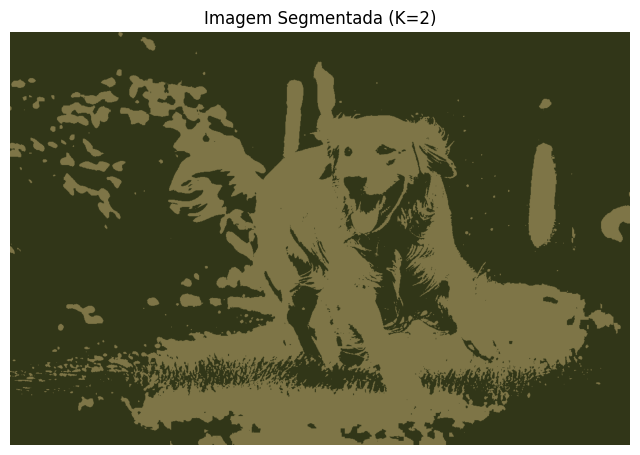

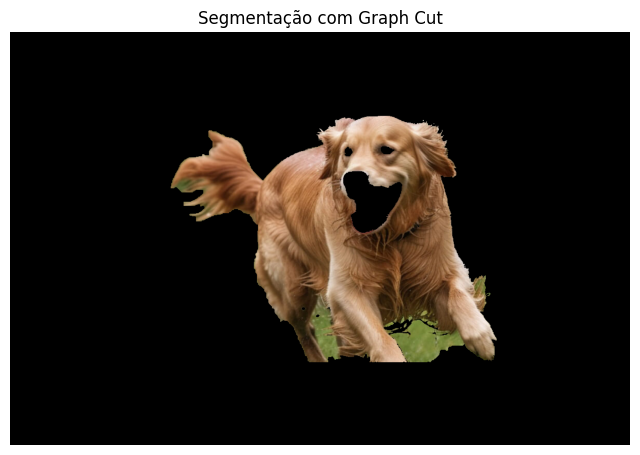

In [39]:
image_path = "sua_imagem_3.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

show_image("Imagem Original", image_rgb)

clustering(image_rgb)

ret = (0.2,0.2,0.6,0.6)
graphos_segmentation(image, image_rgb, ret)